In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Задание 1.
**Решите линейную систему:**  
__| 1 2 3 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|12|  
| 4 0 6 |&nbsp;*&nbsp;X&nbsp;=&nbsp;| 2|  
| 7 8 9 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 1|__

In [111]:
mtx_A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]]) 
mtx_B = np.array([12, 2, 1])
print(np.linalg.det(mtx_A))

# В чем сысл детерминанта, что он означает (кроме наличия отсутствия решения)?

print(np.linalg.solve(mtx_A, mtx_B))
#np.linalg.lstsq(mtx_A, mtx_B)

59.999999999999986
[-9.2         0.9         6.46666667]


### Задание 2.
**Найдите псевдорешение:**  
__x + 2y – z = 1  
3x – 4y = 7  
8x – 5y + 2z = 12  
2x – 5z = 7  
11x +4y – 7z = 15__

In [4]:
mtx_C = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]]) 
mtx_D = np.array([1, 7, 12, 7, 15])
#print(np.linalg.lstsq(mtx_C, mtx_D))
np.linalg.lstsq(mtx_C, mtx_D)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [6]:
# Проверка
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(mtx_C, [x, y, z]) - mtx_D))**2)
Q(1.13919353, -0.90498444, -0.9009803)

0.7152321111819737

### Задание 3.
**Сколько решений имеет линейная система:**  
__| 1 2 3 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|12|  
| 4 5 6 |&nbsp;*&nbsp;X&nbsp;=&nbsp;| 2|  
| 7 8 9 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 1|__  
__Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.__

In [32]:
mtx_E = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
mtx_F = np.array([[12, 2, 1]])
mtx_eggs = np.concatenate((mtx_E, mtx_F.T), axis=1)
print('Детерминант матрицы равен:',np.linalg.det(mtx_E))

print('Ранк исходной матрицы:', np.linalg.matrix_rank(mtx_E, 0.0001))
print('Ранк расширенной матрицы:', np.linalg.matrix_rank(mtx_eggs, 0.0001))
print('\n"2 != 3" и "Детерминант равен 0" => Данная система не имеет ни одного решения.')

#print(np.linalg.solve(mtx_E, mtx_eggs))
np.linalg.lstsq(mtx_E, mtx_eggs)

Детерминант матрицы равен: 6.66133814775094e-16
Ранк исходной матрицы: 2
Ранк расширенной матрицы: 3

"2 != 3" и "Детерминант равен 0" => Данная система не имеет ни одного решения.


(array([[ 0.83333333,  0.33333333, -0.16666667, -7.69444444],
        [ 0.33333333,  0.33333333,  0.33333333, -0.61111111],
        [-0.16666667,  0.33333333,  0.83333333,  6.47222222]]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

In [30]:
mtx_F = np.array([[3, 2, 1]])
print('Изменим вектор правой части:', mtx_F)
mtx_eggs = np.concatenate((mtx_E, mtx_F.T), axis=1)
print('Ранк измененной-расширенной матрицы:', np.linalg.matrix_rank(mtx_eggs, 0.0001))
print('Ранки измененной-расширенной и основной матриц теперь равны. Так как ранк равен 2, а неизвестных 3, то система имеет бесконечное количество решений:')
print(np.linalg.solve(mtx_E, mtx_eggs))
#np.linalg.lstsq(mtx_E, mtx_eggs)

Изменим вектор правой части: [[3 2 1]]
Ранк измененной-расширенной матрицы: 2
Ранки измененной-расширенной и основной матриц теперь равны. Так как ранк равен 2, а неизвестных 3, то система имеет бесконечное количество решений:
[[ 1.          0.5         0.         -9.66666667]
 [ 0.          0.          0.         15.33333333]
 [ 0.          0.5         1.         -6.        ]]


### Задание 4.
**Вычислите LU-разложение матрицы:**  
__| 1&nbsp;&nbsp;&nbsp;2&nbsp;&nbsp;&nbsp;3 |  
| 2 16 21 |  
| 4 28 73 |__  
__После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.__

In [83]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
B = np.array([[0, 3, 41]])
if (np.linalg.det(A) != 0):
    print('Детерминант матрицы не равен "0", значит система имеет одно единственное решение.')
else:
    print('Детерминант матрицы равен "0", значит система не имеет решений или имеет бесконечное множество решений.')
print('Ранк исходной матрицы равен', np.linalg.matrix_rank(A, 0.0001), ', что равно количеству переменных.')
print('')
P, L, U = scipy.linalg.lu(A)
print('P =\n',P)
print('L =\n', L)
print('U =\n', U)

print('\nПроверка правильности разложения:\n', np.dot(P, A) - np.dot(L, U))
# Почему получичились не нули?

print('\nРешение системы уравнений при "B"\n', B, '\nбудет:\n', np.linalg.solve(A, B[0]))

Детерминант матрицы не равен "0", значит система имеет одно единственное решение.
Ранк исходной матрицы равен 3 , что равно количеству переменных.

P =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L =
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U =
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]

Проверка правильности разложения:
 [[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]

Решение системы уравнений при "B"
 [[ 0  3 41]] 
будет:
 [-1. -1.  1.]


### Задание 5.
**Найдите нормальное псевдорешение недоопределенной системы:**  
__x + 2y – z = 1  
8x – 5y + 2z = 12__  
__Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.__

In [87]:
mtx_G = np.array([[1, 2, -1], [8, -5, 2]]) 
mtx_H = np.array([[1, 12]])
np.linalg.lstsq(mtx_G, mtx_H[0])

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

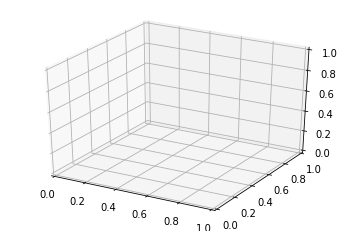

In [98]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

# Почему эта функция равна норме решения?
# В чем ее отличие от np.linalg.norm?
# Что такое вообще норма, ее практический смысл?

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d')
plt.show()

### Задание 6.
**Найдите одно из псевдорешений вырожденной системы:**  
__| 1 2 3 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 2|  
| 4 5 6 |&nbsp;*&nbsp;X&nbsp;=&nbsp;| 5|  
| 7 8 9 |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|11|__  
__Попробуйте также отыскать и нормальное псевдорешение.__

In [110]:
mtx_I = np.array([[2, 5, 11]]) 
print('A =\n', mtx_E)
print('B =\n', mtx_I)
np.linalg.lstsq(mtx_E, mtx_I[0])

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
B =
 [[ 2  5 11]]


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))